## Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [30]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].dropna().sample()       # this will pick random sample from dataframe

3    35.0
Name: Age, dtype: float64

In [23]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [24]:
random = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)
random.values

array([42. ,  3. , 29. , 24. , 43. ,  8. , 33. , 54. , 28. , 23. , 17. ,
       32.5, 31. , 38. , 35. , 23. , 23.5, 16. , 27. , 54. , 16. , 50. ,
        9. , 35. , 22. , 17. , 16. , 26. , 14.5, 38. , 21. ,  9. , 36. ,
       35. , 37. , 36. , 34. , 56. , 61. , 51. ,  9. , 20. , 36. , 54. ,
       52. , 29. , 34. , 21. , 40. , 48. , 37. , 24. , 27. , 28. , 25. ,
       57. , 28. ,  3. , 26. , 62. , 58. , 25. , 45. , 17. , 19. , 47. ,
        6. , 22. , 31. , 33. , 17. , 62. , 16. , 20. , 45. , 20. , 19. ,
       18. , 30.5, 11. , 11. , 31. , 40. , 19. , 25. , 20. ,  9. , 40.5,
       19. , 21. , 45. , 38. , 50. , 29. , 34. , 26. , 24. , 29. , 30. ,
       39. , 28. , 19. , 30. ,  3. ,  4. , 34. , 20. , 36. , 44. , 40. ,
       28. , 21. ,  9. , 52. , 17. , 30. , 32. , 14. , 29. , 43. , 17. ,
       11. , 25. , 20. , 25. , 26. , 21. , 17. , 29. , 44. , 25. , 28. ,
       26. , 34. ,  2. , 22. , 33. , 37. , 10. ,  1. , 35. , 21. , 19. ,
       31. , 26. , 30. , 33. , 25. , 40. , 22. , 42

In [18]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [43]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    
    df[variable+"_random"]=df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=42)# it will have random sample to fill the na
    # pandas need to have same indx in order to merge the dataset
    random_sample.index = df[df['Age'].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [44]:
median = df.Age.median()

In [45]:
impute_nan(df,'Age',median)

In [46]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [49]:
print(df['Age'].std())
print(df['Age_median'].std())
print(df['Age_random'].std())

14.526497332334044
13.019696550973194
14.295286948654615


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

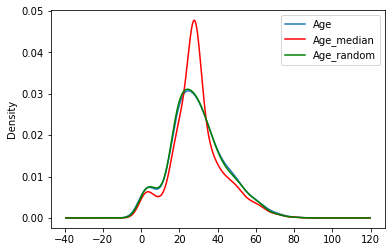

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy To implement
- There is less distortion in variance.
### Disadvantage
- Every situation randomness wont work